# READING & PLOTTING FROM A CSV


The following tutorials examples are taken from:

https://www.w3schools.com/python/pandas/pandas_plotting.asp

and 

https://tutswiki.com/pandas-cookbook/chapter1/#google_vignette


In [26]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt


In [28]:
from google.colab import drive
drive.mount('/content/drive/') 

#MyDrive/Intro_DataScience/pandas_akriti/')

Mounted at /content/drive/


**Note:** If you are unable to mount your drive that contain the data files, then try downloading the files and run from your local system.

# Reading a data file - Part 1


We will use pandas to read and plot the data files.
Pandas uses the plot() method to create diagrams.

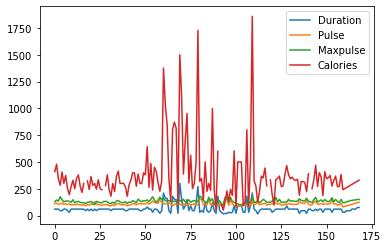

In [29]:
### Give the path to the folder containing data files.
### As the main folder (Intro_DataScience) was a shared folder and I was unable to access the 'shared with me' folder from here. 
### I added a shortcut of the main folder (Intro_DataScience) in MyDrive and copied its path from there.

df = pd.read_csv('/content/drive/MyDrive/Intro_DataScience/pandas_akriti/data.csv')    #reading the data file


df.plot() ## plotting
plt.show()


# 1.1 Scatter Plot

Specify that you want a scatter plot with the kind argument:

kind = 'scatter'

A scatter plot needs an x- and a y-axis.

In the example below we will use "Duration" for the x-axis and "Calories" for the y-axis.

Include the x and y arguments like this:

x = 'Duration', y = 'Calories'

We will observe a good correlation between "Duration" and "Calories".

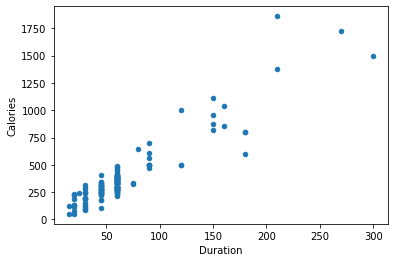

In [ ]:
df.plot(kind = 'scatter', x = 'Duration', y = 'Calories')

plt.show()

Let's create another scatterplot, where there is a bad relationship between the columns, like "Duration" and "Maxpulse".

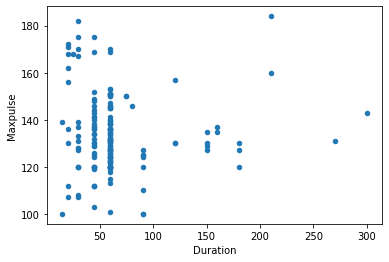

In [ ]:
df.plot(kind = 'scatter', x = 'Duration', y = 'Maxpulse')

plt.show()

# Reading data from a CSV file - Part 2


You can read data from a CSV file using the read_csv function. By default, it assumes that the fields are comma-separated.

We’re going to be looking some cyclist data from Montréal. Here’s the original page (in French). We’re using the data from 2012. Download the bikes.csv file to try out the below examples.

This dataset is a list of how many people were on 7 different bike paths in Montreal, each day.



In [30]:
broken_df = pd.read_csv('/content/drive/MyDrive/Intro_DataScience/pandas_akriti/bikes.csv')  ## Reading 
# Look at the first 3 rows
broken_df[:3]



,Date;Berri 1;Br?beuf (donn?es non disponibles);C?te-Sainte-Catherine;Maisonneuve 1;Maisonneuve 2;du Parc;Pierre-Dupuy;Rachel1;St-Urbain (donn?es non disponibles)
0,01/01/2012;35;;0;38;51;26;10;16;
1,02/01/2012;83;;1;68;153;53;6;43;
2,03/01/2012;135;;2;104;248;89;3;58;


# 2.1 Fixing a broken data file using panda

You’ll notice that this is totally broken! read_csv has a bunch of options that will let us fix that, though. Here we’ll

1. Change the column separator to a ;
2. Set the encoding to '_latin1_' (the default is '_utf8_')
3. Parse the dates in the 'Date' column
4. Tell it that our dates have the date first instead of the month first
5. Set the index to be the 'Date' column

In [32]:
fixed_df = pd.read_csv('/content/drive/MyDrive/Intro_DataScience/pandas_akriti/bikes.csv', sep=';', encoding='latin1', parse_dates=['Date'], dayfirst=True, index_col='Date')
fixed_df[:3]

,Berri 1,Br?beuf (donn?es non disponibles),C?te-Sainte-Catherine,Maisonneuve 1,Maisonneuve 2,du Parc,Pierre-Dupuy,Rachel1,St-Urbain (donn?es non disponibles)
Date,,,,,,,,,
2012-01-01,35,NaN,0,38,51,26,10,16,NaN
2012-01-02,83,NaN,1,68,153,53,6,43,NaN
2012-01-03,135,NaN,2,104,248,89,3,58,NaN


# 2.2 Selecting a column
When you read a CSV, you get a kind of object called a DataFrame, which is made up of rows and columns. You get columns out of a DataFrame the same way you get elements out of a dictionary.

Here’s an example:

In [33]:
fixed_df['Berri 1']

Date
2012-01-01      35
2012-01-02      83
2012-01-03     135
2012-01-04     144
2012-01-05     197
              ... 
2012-11-01    2405
2012-11-02    1582
2012-11-03     844
2012-11-04     966
2012-11-05    2247
Name: Berri 1, Length: 310, dtype: int64

# 2.3 Plotting a column
Just add .plot() to the end! How could it be easier? =)

We can see that, unsurprisingly, not many people are biking in January, February, and March.



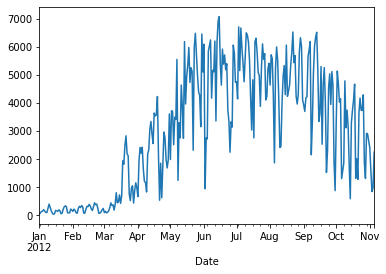

In [34]:
fixed_df['Berri 1'].plot()

We can also plot all the columns just as easily. We’ll make it a little bigger, too. You can see that it’s more squished together, but all the bike paths behave basically the same – if it’s a bad day for cyclists, it’s a bad day everywhere.

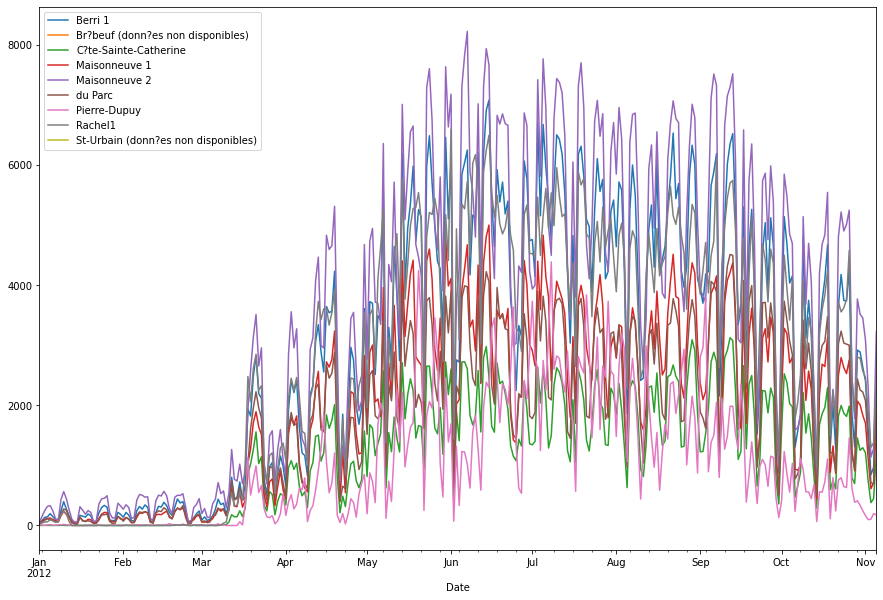

In [35]:
fixed_df.plot(figsize=(15, 10))
plt.show()